# Qlearning 
## task:-
To describes an agent which uses unsupervised training to learn about an unknown environment.
Here enviorment resembles a graph the states are nodes of graph and the actions are path from one node to other.
So given a current state we need to find the path to the target node. 

In [16]:
import numpy as np
import pylab as plt

# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (7,2)]
goal = 7

In [21]:
#points_list[::-1]=100

### Enviorment 
The graph in the next cell shows that point 0 is where our bot will start its journey and point 7 is it’s final goal. The extra added points and false paths are the obstacles the bot will have to contend with.

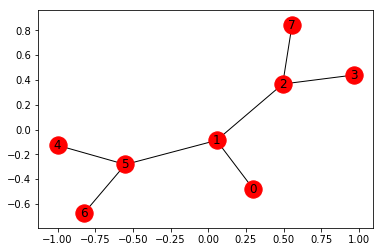

In [22]:

import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()


### Reward matrix
Make a matrix where, the y-axis is the state or where your bot is currently located, and the x-axis is your possible next actions.

In [23]:
# how many points in graph? x points
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1
print(R)

[[-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]]


## assign zeros to paths and 100 to goal-reaching point
 here you need to check 2 condition
 if there is a path to goal point so make it 100
 if there is a normal path make it 0


In [24]:
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100
print(R)

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(7, 2)
[[ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.  -1.   0.  -1.  -1.  -1. 100.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1. 100.]]


### Q matrix
Make a Q matrix where the rows of matrix Q represent the current state of the agent, and the columns represent the possible actions leading to the next state (the links between the nodes).

In [25]:
#creating matrix to sote q value for each path
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8
initial_state = 0
print(Q.shape)
print(Q)

(8, 8)
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [26]:
def available_actions(state):
    # get available actions based on current state 
    
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(1) 
print(available_act)

[0 2 5]


In [28]:
available_actions(1)

array([0, 2, 5])

In [31]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action
#select a random action from available actions
action = sample_next_action(available_act)
print(action)


0


In [25]:
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
    if max_index.shape[0] > 1:
        
        
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
        
    max_value = Q[action, max_index]
    print("current_state,action",current_state,action)
    print("Old Q[",current_state, action,"]=",Q[current_state, action])
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print("New Q[",current_state, action,"]=",Q[current_state, action])
    
    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)
  
print(update(2, 7, gamma))
print(update(1, 0, gamma))
print(update(1, 5, gamma))
print(update(1, 2, gamma))
print(update(0, 1, gamma))
print(update(2, 7, gamma))
#update the q value for current state basedon available actions


current_state,action 2 7
Old Q[ 2 7 ]= 0.0
New Q[ 2 7 ]= 100.0
100.0
current_state,action 1 0
Old Q[ 1 0 ]= 0.0
New Q[ 1 0 ]= 0.0
100.0
current_state,action 1 5
Old Q[ 1 5 ]= 0.0
New Q[ 1 5 ]= 0.0
100.0
current_state,action 1 2
Old Q[ 1 2 ]= 0.0
New Q[ 1 2 ]= 80.0
180.0
current_state,action 0 1
Old Q[ 0 1 ]= 0.0
New Q[ 0 1 ]= 64.0
244.0
current_state,action 2 7
Old Q[ 2 7 ]= 100.0
New Q[ 2 7 ]= 100.0
244.0


In [26]:
# Training
# this step is to fill up all the Q matrix at it's maximum 
# plot the value retured by update() v/s itr to know at which itreration we reach max Q 
scores = []
itrr=[]
for i in range(700):
        current_state = np.random.randint(0, int(Q.shape[0]))
        available_act = available_actions(current_state)
        action = sample_next_action(available_act)
        #print("Btw state ",current_state," and ",action)
        score = update(current_state,action,gamma)
        scores.append(score)
        itrr.append(i)
        print ('Score:', str(score))
    #iterate over all the possibe states and paths randomly in many iterations to update the q-values
 
plt.plot(itrr,scores)
plt.grid()
plt.show()

current_state,action 1 5
Old Q[ 1 5 ]= 0.0
New Q[ 1 5 ]= 0.0
Score: 244.0
current_state,action 5 4
Old Q[ 5 4 ]= 0.0
New Q[ 5 4 ]= 0.0
Score: 244.0
current_state,action 5 6
Old Q[ 5 6 ]= 0.0
New Q[ 5 6 ]= 0.0
Score: 244.0
current_state,action 6 5
Old Q[ 6 5 ]= 0.0
New Q[ 6 5 ]= 0.0
Score: 244.0
current_state,action 0 1
Old Q[ 0 1 ]= 64.0
New Q[ 0 1 ]= 64.0
Score: 244.0
current_state,action 7 7
Old Q[ 7 7 ]= 0.0
New Q[ 7 7 ]= 100.0
Score: 344.0
current_state,action 2 7
Old Q[ 2 7 ]= 100.0
New Q[ 2 7 ]= 180.0
Score: 235.55555555555554
current_state,action 3 2
Old Q[ 3 2 ]= 0.0
New Q[ 3 2 ]= 144.0
Score: 315.55555555555554
current_state,action 4 5
Old Q[ 4 5 ]= 0.0
New Q[ 4 5 ]= 0.0
Score: 315.55555555555554
current_state,action 5 6
Old Q[ 5 6 ]= 0.0
New Q[ 5 6 ]= 0.0
Score: 315.55555555555554
current_state,action 5 1
Old Q[ 5 1 ]= 0.0
New Q[ 5 1 ]= 64.0
Score: 351.1111111111111
current_state,action 0 1
Old Q[ 0 1 ]= 64.0
New Q[ 0 1 ]= 64.0
Score: 351.1111111111111
current_state,action 4 

New Q[ 0 1 ]= 236.11392000000006
Score: 603.2557238171701
current_state,action 3 2
Old Q[ 3 2 ]= 295.14240000000007
New Q[ 3 2 ]= 295.14240000000007
Score: 603.2557238171701
current_state,action 0 1
Old Q[ 0 1 ]= 236.11392000000006
New Q[ 0 1 ]= 236.11392000000006
Score: 603.2557238171701
current_state,action 1 5
Old Q[ 1 5 ]= 51.2
New Q[ 1 5 ]= 51.2
Score: 603.2557238171701
current_state,action 1 0
Old Q[ 1 0 ]= 51.2
New Q[ 1 0 ]= 188.89113600000007
Score: 636.3454930803565
current_state,action 3 2
Old Q[ 3 2 ]= 295.14240000000007
New Q[ 3 2 ]= 295.14240000000007
Score: 636.3454930803565
current_state,action 7 2
Old Q[ 7 2 ]= 295.14240000000007
New Q[ 7 2 ]= 295.14240000000007
Score: 636.3454930803565
current_state,action 4 5
Old Q[ 4 5 ]= 51.2
New Q[ 4 5 ]= 51.2
Score: 636.3454930803565
current_state,action 2 3
Old Q[ 2 3 ]= 188.92800000000005
New Q[ 2 3 ]= 236.11392000000006
Score: 647.6851569877788
current_state,action 1 2
Old Q[ 1 2 ]= 295.14240000000007
New Q[ 1 2 ]= 295.14240000

New Q[ 3 2 ]= 382.40781395558406
Score: 948.4659672390528
current_state,action 2 7
Old Q[ 2 7 ]= 478.0097674444801
New Q[ 2 7 ]= 478.0097674444801
Score: 948.4659672390528
current_state,action 1 5
Old Q[ 1 5 ]= 221.64026163200006
New Q[ 1 5 ]= 244.7410009315738
Score: 953.298659136349
current_state,action 7 7
Old Q[ 7 7 ]= 472.5122093056001
New Q[ 7 7 ]= 478.0097674444801
Score: 954.4487524008174
current_state,action 2 1
Old Q[ 2 1 ]= 277.05032704000007
New Q[ 2 1 ]= 305.92625116446726
Score: 960.4896172724376
current_state,action 0 1
Old Q[ 0 1 ]= 305.92625116446726
New Q[ 0 1 ]= 305.92625116446726
Score: 960.4896172724376
current_state,action 1 5
Old Q[ 1 5 ]= 244.7410009315738
New Q[ 1 5 ]= 244.7410009315738
Score: 960.4896172724376
current_state,action 0 1
Old Q[ 0 1 ]= 305.92625116446726
New Q[ 0 1 ]= 305.92625116446726
Score: 960.4896172724376
current_state,action 3 2
Old Q[ 3 2 ]= 382.40781395558406
New Q[ 3 2 ]= 382.40781395558406
Score: 960.4896172724376
current_state,action 1

current_state,action 6 5
Old Q[ 6 5 ]= 250.2353924769658
New Q[ 6 5 ]= 252.31065118525817
Score: 980.7331289955769
current_state,action 3 2
Old Q[ 3 2 ]= 392.79424059620726
New Q[ 3 2 ]= 394.23539247696584
Score: 981.0255739476556
current_state,action 6 5
Old Q[ 6 5 ]= 252.31065118525817
New Q[ 6 5 ]= 252.31065118525817
Score: 981.0255739476556
current_state,action 4 5
Old Q[ 4 5 ]= 252.31065118525817
New Q[ 4 5 ]= 252.31065118525817
Score: 981.0255739476556
current_state,action 1 0
Old Q[ 1 0 ]= 250.2353924769658
New Q[ 1 0 ]= 252.31065118525817
Score: 981.446694678649
current_state,action 6 5
Old Q[ 6 5 ]= 252.31065118525817
New Q[ 6 5 ]= 252.31065118525817
Score: 981.446694678649
current_state,action 5 1
Old Q[ 5 1 ]= 315.3883139815727
New Q[ 5 1 ]= 315.3883139815727
Score: 981.446694678649
current_state,action 3 2
Old Q[ 3 2 ]= 394.23539247696584
New Q[ 3 2 ]= 394.23539247696584
Score: 981.446694678649
current_state,action 2 7
Old Q[ 2 7 ]= 492.79424059620726
New Q[ 2 7 ]= 492.7942

Old Q[ 1 5 ]= 253.63881675856524
New Q[ 1 5 ]= 255.03285934430843
Score: 981.6787352380509
current_state,action 2 1
Old Q[ 2 1 ]= 319.03285934430846
New Q[ 2 1 ]= 319.03285934430846
Score: 981.6787352380509
current_state,action 1 2
Old Q[ 1 2 ]= 398.7910741803855
New Q[ 1 2 ]= 399.2262874754468
Score: 981.765946588348
current_state,action 0 1
Old Q[ 0 1 ]= 319.03285934430846
New Q[ 0 1 ]= 319.3810299803574
Score: 981.8357156685859
current_state,action 0 1
Old Q[ 0 1 ]= 319.3810299803574
New Q[ 0 1 ]= 319.3810299803574
Score: 981.8357156685859
current_state,action 1 2
Old Q[ 1 2 ]= 399.2262874754468
New Q[ 1 2 ]= 399.2262874754468
Score: 981.8357156685859
current_state,action 5 6
Old Q[ 5 6 ]= 204.02628747544676
New Q[ 5 6 ]= 204.02628747544676
Score: 981.8357156685859
current_state,action 5 6
Old Q[ 5 6 ]= 204.02628747544676
New Q[ 5 6 ]= 204.02628747544676
Score: 981.8357156685859
current_state,action 3 2
Old Q[ 3 2 ]= 398.7910741803855
New Q[ 3 2 ]= 399.2262874754468
Score: 981.92292

New Q[ 1 2 ]= 399.8961540628294
Score: 981.9331197109975
current_state,action 0 1
Old Q[ 0 1 ]= 319.6038591874288
New Q[ 0 1 ]= 319.91692325026355
Score: 981.9957487830012
current_state,action 3 2
Old Q[ 3 2 ]= 399.50482398428596
New Q[ 3 2 ]= 399.8961540628294
Score: 982.0740351230057
current_state,action 4 5
Old Q[ 4 5 ]= 255.68308734994304
New Q[ 4 5 ]= 255.68308734994304
Score: 982.0740351230057
current_state,action 2 7
Old Q[ 2 7 ]= 499.8701925785367
New Q[ 2 7 ]= 499.8701925785367
Score: 982.0740351230057
current_state,action 4 5
Old Q[ 4 5 ]= 255.68308734994304
New Q[ 4 5 ]= 255.68308734994304
Score: 982.0740351230057
current_state,action 2 1
Old Q[ 2 1 ]= 319.6038591874288
New Q[ 2 1 ]= 319.91692325026355
Score: 982.1366641950093
current_state,action 3 2
Old Q[ 3 2 ]= 399.8961540628294
New Q[ 3 2 ]= 399.8961540628294
Score: 982.1366641950093
current_state,action 5 6
Old Q[ 5 6 ]= 204.4038591874288
New Q[ 5 6 ]= 204.54646987995443
Score: 982.1651937402078
current_state,action 6 

In [29]:
print("Trained Q matrix:")
pq=(Q/np.max(Q)*100)
for i in range(pq.shape[0]):
    print(i)
    print(pq[i,])
    print("")

Trained Q matrix:
0
[[ 0. 64.  0.  0.  0.  0.  0.  0.]]

1
[[51.19863873  0.         80.          0.          0.         51.14205583
   0.          0.        ]]

2
[[  0.  64.   0.  64.   0.   0.   0. 100.]]

3
[[ 0.  0. 80.  0.  0.  0.  0.  0.]]

4
[[ 0.          0.          0.          0.          0.         51.19863873
   0.          0.        ]]

5
[[ 0.         63.99829841  0.          0.         40.95891098  0.
  40.95891098  0.        ]]

6
[[ 0.          0.          0.          0.          0.         51.19863873
   0.          0.        ]]

7
[[ 0.          0.         80.          0.          0.          0.
   0.         99.99734126]]



In [31]:

# Testing
# given a current step it will find the best path
current_state = 6
steps = [current_state]


while current_state != 7:
        next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
        if next_step_index.shape[0] > 1:
            next_step_index = int(np.random.choice(next_step_index, size = 1))
        else:
            next_step_index = int(next_step_index)
    
        steps.append(next_step_index)
        current_state = next_step_index


    # start fom initial state and keep chosing the path with highest q-values untillwe reach the goal state.

print("Most efficient path:")
print(steps)



Most efficient path:
[6, 5, 1, 2, 7]
